In [ ]:
# 📘 Customer Sentiment Classifier for ReviewPro Analytics

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [5]:
from google.colab import files

uploaded = files.upload()  # Upload your .csv file here

# Load into DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving Customer Sentiment Classifier for ReviewPro Analytics.csv to Customer Sentiment Classifier for ReviewPro Analytics.csv


,review_text,sentiment
0,So-so,neutral
1,Loved the product,positive
2,Loved the product,positive
3,Top quality,positive
4,Great experience,positive


In [6]:
print(df.info())
print(df['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  1000 non-null   object
 1   sentiment    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
sentiment
positive    391
negative    312
neutral     297
Name: count, dtype: int64


In [7]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean the text
def preprocess_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_review'] = df['review_text'].apply(preprocess_text)
df[['review_text', 'cleaned_review']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,review_text,cleaned_review
0,So-so,soso
1,Loved the product,loved product
2,Loved the product,loved product
3,Top quality,top quality
4,Great experience,great experience


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # Converts to integers


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5540 - loss: 1.0504 - val_accuracy: 1.0000 - val_loss: 0.9092
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.8455 - val_accuracy: 1.0000 - val_loss: 0.6342
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.5308 - val_accuracy: 1.0000 - val_loss: 0.2813
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2129 - val_accuracy: 1.0000 - val_loss: 0.0810
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0610 - val_accuracy: 1.0000 - val_loss: 0.0309
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0231 - val_accuracy: 1.0000 - val_loss: 0.0160
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0069
Ep

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0041 
Test Accuracy: 1.00


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


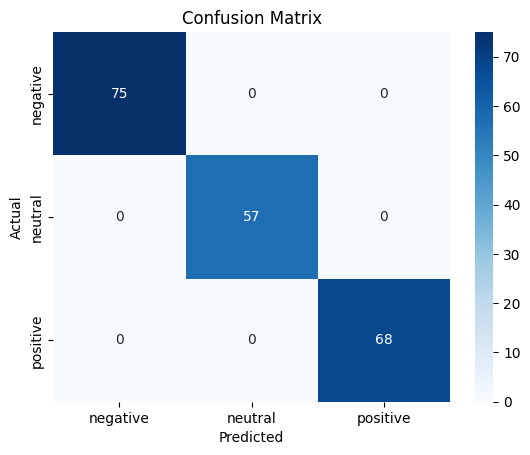

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        75
     neutral       1.00      1.00      1.00        57
    positive       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))
